Importamos todas las librerías que usaremos

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

importamos los datos que vamos a utilizar

In [4]:
data=pd.read_csv('CSA-Data.csv')

hacemos el analisis exploratorio de los datos

In [5]:
data.head(5)

,"""Children are safe among family members such as grandparents, uncles, aunts, cousins""","""Children are mainly abused by strangers in our society""",Male children dont need sexual abuse prevention knowledge,"""Teaching sexual abuse prevention in school is not necessary. It will make children curious about sex""",Do you know what child grooming is?,Do you know what signs to look for to identify if your child has been abused?,Do you think children need post abuse counseling for recovering?,Do you think you should take legal action against the abuser of your child?,Knowledge Level
0,Agree,Agree,Disagree,Agree,No,No,No,Yes,Beginner
1,Agree,Agree,Disagree,Disagree,No,No,Yes,Yes,Beginner
2,Disagree,Disagree,Disagree,Disagree,No,No,Yes,Yes,Beginner
3,Agree,Agree,Disagree,Disagree,No,No,Yes,Yes,Beginner
4,Agree,Disagree,Disagree,Disagree,Yes,Yes,Yes,Yes,Intermediate


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002 entries, 0 to 3001
Data columns (total 9 columns):
 #   Column                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                  --------------  ----- 
 0   "Children are safe among family members such as grandparents, uncles, aunts, cousins"                   3002 non-null   object
 1   "Children are mainly abused by strangers in our society"                                                3002 non-null   object
 2   Male children dont need sexual abuse prevention knowledge                                               3002 non-null   object
 3   "Teaching sexual abuse prevention in school is not necessary. It will make children curious about sex"  3002 non-null   object
 4   Do you know what child grooming is?                                                              

In [7]:
features = ['Children are safe among family members such as grandparents, uncles, aunts, cousins',	'Children are mainly abused by strangers in our society',	'Male children dont need sexual abuse prevention knowledge',	'Teaching sexual abuse prevention in school is not necessary. It will make children curious about sex',	'Do you know what child grooming is?',	'Do you know what signs to look for to identify if your child has been abused?',	'Do you think children need post abuse counseling for recovering?','Do you think you should take legal action against the abuser of your child?']
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [8]:
label = LabelEncoder()
for col in X.columns:
    X[col]=label.fit_transform(X[col])
X    

<ipython-input-8-dfdb58f401c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col]=label.fit_transform(X[col])


,"""Children are safe among family members such as grandparents, uncles, aunts, cousins""","""Children are mainly abused by strangers in our society""",Male children dont need sexual abuse prevention knowledge,"""Teaching sexual abuse prevention in school is not necessary. It will make children curious about sex""",Do you know what child grooming is?,Do you know what signs to look for to identify if your child has been abused?,Do you think children need post abuse counseling for recovering?,Do you think you should take legal action against the abuser of your child?
0,0,0,1,0,0,0,0,1
1,0,0,1,1,0,0,1,1
2,1,1,1,1,0,0,1,1
3,0,0,1,1,0,0,1,1
4,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
2997,0,0,1,1,0,0,1,1
2998,0,0,1,1,0,1,1,0
2999,0,0,0,0,0,0,0,0
3000,1,0,0,0,1,1,1,1


In [9]:
y=label.fit_transform(y)

dividimos los datos en datasets de entrenamiento y evaluación

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

creamos el modelo clasificatorio de arboles de decisión

In [11]:
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='entropy',max_depth=10,random_state=33) 
DecisionTreeClassifierModel.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=33)

<BarContainer object of 8 artists>

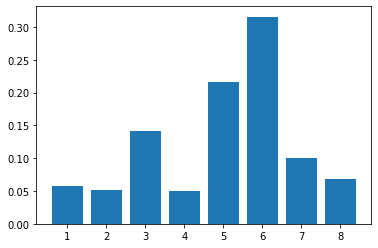

In [12]:
X_bar=list(range(1,9))
plt.bar(X_bar,DecisionTreeClassifierModel.feature_importances_)

generamos una predicción

In [13]:

y_pred_decisiontree = DecisionTreeClassifierModel.predict(X_test)



generamos las métricas de rendimiento del modelo


In [14]:
ClassificationReport_DT = classification_report(y_test,y_pred_decisiontree)
print('Classification Report : \n', ClassificationReport_DT )

Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       564
           1       0.91      0.93      0.92       427

    accuracy                           0.93       991
   macro avg       0.93      0.93      0.93       991
weighted avg       0.93      0.93      0.93       991



creamos la matriz de confusión del modelo

Confusion Matrix : 
 [[525  39]
 [ 28 399]]


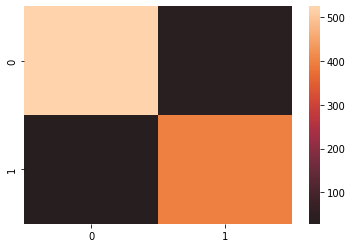

In [15]:
SCM = confusion_matrix(y_test, y_pred_decisiontree)
print('Confusion Matrix : \n', SCM)
sns.heatmap(SCM, center = True)
plt.show()

In [17]:
import graphviz 
from sklearn.tree import export_graphviz


In [18]:
dot_data = export_graphviz(DecisionTreeClassifierModel, out_file=None, 
                         feature_names=features,  
                         class_names=True,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)

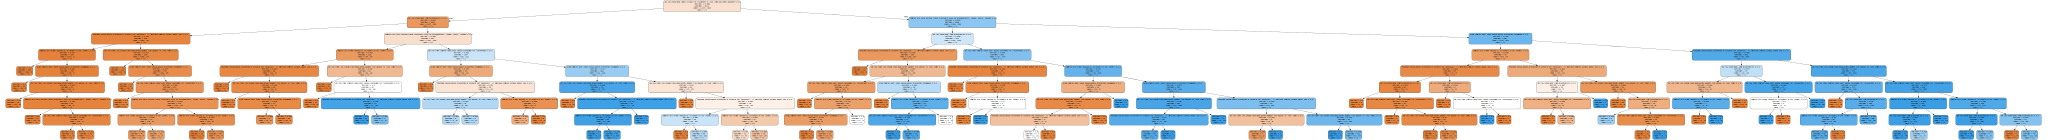

In [19]:
graph

In [20]:
graph.format = "png"
graph.render("file_name")

'file_name.png'